# Importaciones

In [1]:
import pandas as pd
import yfinance as yf
from alpha_vantage.timeseries import TimeSeries
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt


In [3]:
load_dotenv()  # carga el archivo .env en el entorno
api_key = os.getenv("ALPHAVANTAGE_API_KEY")

if not api_key:
    raise RuntimeError("No se encontró la clave ALPHAVANTAGE_API_KEY. Revisa tu archivo .env.")

print("API key cargada correctamente ✅")


API key cargada correctamente ✅


In [4]:
# Datos desde Yahoo Finance
df_yahoo = yf.download("AAPL", start="2023-01-01", end="2024-12-31")

# Normalizamos las columnas y el índice
df_yahoo = df_yahoo.rename(columns=str.lower).sort_index()

print("Yahoo Finance:")
display(df_yahoo.head())
print("Fechas:", df_yahoo.index.min(), "→", df_yahoo.index.max())


C:\Users\diego\AppData\Local\Temp\ipykernel_15628\3340465834.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_yahoo = yf.download("AAPL", start="2023-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Yahoo Finance:


Price,close,high,low,open,volume
Ticker,aapl,aapl,aapl,aapl,aapl
Date,,,,,
2023-01-03,123.330635,129.079551,122.443150,128.468178,112117500
2023-01-04,124.602707,126.870724,123.340509,125.125335,89113600
2023-01-05,123.281349,125.993105,123.024970,125.362006,80962700
2023-01-06,127.817337,128.478017,123.153123,124.257549,87754700
2023-01-09,128.339951,131.554622,128.083572,128.655507,70790800


Fechas: 2023-01-03 00:00:00 → 2024-12-30 00:00:00


In [ ]:
ts = TimeSeries(key=api_key, output_format="pandas")

# Datos diarios (outputsize='compact' → ~100 días, 'full' → histórico completo)
df_alpha, meta = ts.get_daily(symbol="AAPL", outputsize="full")


In [7]:
df_alpha

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-10-22,262.650,262.850,255.43,258.45,45015254.0
2025-10-21,261.880,265.290,261.83,262.77,46695948.0
2025-10-20,255.885,264.375,255.63,262.24,90483029.0
2025-10-17,248.020,253.380,247.27,252.29,49146961.0
2025-10-16,248.250,249.040,245.13,247.45,39776974.0
...,...,...,...,...,...
1999-11-05,84.620,88.370,84.00,88.31,3721500.0
1999-11-04,82.060,85.370,80.62,83.62,3384700.0
1999-11-03,81.620,83.250,81.00,81.50,2932700.0


In [8]:
meta

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2025-10-22',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [ ]:
# Normalizamos formato
df_alpha = df_alpha.rename(
    columns={
        "1. open": "open",
        "2. high": "high",
        "3. low": "low",
        "4. close": "close",
        "5. volume": "volume"
    }
).sort_index()

print("Alpha Vantage:")
display(df_alpha.head())
print("Fechas:", df_alpha.index.min(), "→", df_alpha.index.max())

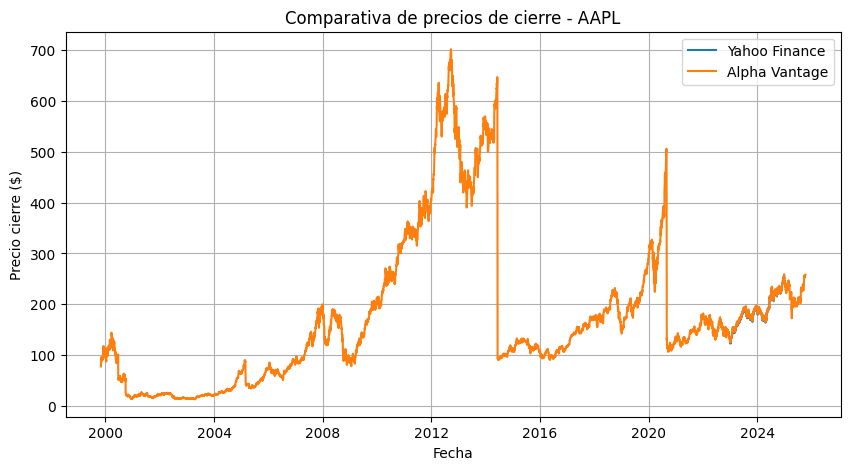

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(df_yahoo["close"], label="Yahoo Finance")
plt.plot(df_alpha["close"], label="Alpha Vantage")
plt.title("Comparativa de precios de cierre - AAPL")
plt.xlabel("Fecha")
plt.ylabel("Precio cierre ($)")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
summary = pd.DataFrame({
    "Fuente": ["Yahoo Finance", "Alpha Vantage"],
    "Columnas": [list(df_yahoo.columns), list(df_alpha.columns)],
    "Rango de fechas": [
        f"{df_yahoo.index.min().date()} → {df_yahoo.index.max().date()}",
        f"{df_alpha.index.min().date()} → {df_alpha.index.max().date()}",
    ],
    "Número de filas": [len(df_yahoo), len(df_alpha)]
})

display(summary)


,Fuente,Columnas,Rango de fechas,Número de filas
0,Yahoo Finance,"[(close, aapl), (high, aapl), (low, aapl), (op...",2023-01-03 → 2024-12-30,501
1,Alpha Vantage,"[open, high, low, close, volume]",1999-11-01 → 2025-10-08,6524


In [8]:
def estandarizar(df):
    return df[["open", "high", "low", "close", "volume"]].copy().sort_index()

df_yahoo_std = estandarizar(df_yahoo)
df_alpha_std = estandarizar(df_alpha)

print(df_yahoo_std.head(2))
print(df_alpha_std.head(2))


Price             open        high         low       close     volume
Ticker            aapl        aapl        aapl        aapl       aapl
Date                                                                 
2023-01-03  128.468178  129.079551  122.443150  123.330635  112117500
2023-01-04  125.125335  126.870724  123.340509  124.602707   89113600
            open   high    low  close     volume
date                                            
1999-11-01  80.0  80.69  77.37  77.62  2487300.0
1999-11-02  78.0  81.69  77.31  80.25  3564600.0


In [ ]:
df_yahoo.columns

MultiIndex([( 'close', 'aapl'),
            (  'high', 'aapl'),
            (   'low', 'aapl'),
            (  'open', 'aapl'),
            ('volume', 'aapl')],
           names=['Price', 'Ticker'])

: 